In [18]:
%run "../../PyUtils/common.ipynb"
import datetime

import os
import os.path
import sys
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta;
from random import randint
from collections import defaultdict
import matplotlib
import re;
import json;
from pylab import rcParams

from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
from matplotlib.finance import quotes_historical_yahoo_ochl, quotes_historical_yahoo_ohlc
from hmmlearn.hmm import GaussianHMM

<IPython.core.display.Javascript object>

In [24]:
#from pandas.io import data, wb # becomes
#from pandas_datareader import data, wb


import pandas_datareader as pdr
q=pdr.get_data_yahoo('AAPL')
q

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.490,30.643,30.340,27.613,30.573,123432400
2010-01-05,30.657,30.799,30.464,27.661,30.626,150476200
2010-01-06,30.626,30.747,30.107,27.221,30.139,138040000
2010-01-07,30.250,30.286,29.864,27.171,30.083,119282800
...,...,...,...,...,...,...
2017-07-12,145.870,146.180,144.820,145.740,145.740,24884500
2017-07-13,145.500,148.490,145.440,147.770,147.770,25199400
2017-07-14,147.970,149.330,147.330,149.040,149.040,20132100
2017-07-17,148.820,150.900,148.570,149.560,149.560,23736100


In [ ]:
quotes = q
dates = np.array(quotes.index)
close_v = np.array(quotes.Close)
volume = np.array(q.Volume[1:])

diff = np.diff(close_v)
dates = dates[1:]
close_v = close_v[1:]

# Pack diff and volume for training.
X = np.column_stack([diff, volume])
X

In [20]:
print("fitting to HMM and decoding ...", end="")

# Make an HMM instance and execute fit
model = GaussianHMM(n_components=4, covariance_type="diag", n_iter=1000).fit(X)

# Predict the optimal sequence of internal hidden state
hidden_states = model.predict(X)

print("done")

fitting to HMM and decoding ...done


In [36]:
mask = hidden_states == 4
dates[hidden_states == 4]
dates[0]

numpy.datetime64('2010-01-05T00:00:00.000000000')

Transition matrix
[[  9.12e-01   2.10e-42   8.04e-02   7.48e-03]
 [  2.23e-22   8.90e-01   1.06e-33   1.10e-01]
 [  1.58e-01   2.77e-31   8.28e-01   1.39e-02]
 [  7.12e-03   9.78e-02   1.32e-02   8.82e-01]]

Means and vars of each hidden state
0th hidden state
mean =  [  9.07e-02   9.70e+07]
var =  [  4.29e-01   6.84e+14]

1th hidden state
mean =  [  1.65e-01   2.93e+07]
var =  [  7.96e-01   5.37e+13]

2th hidden state
mean =  [ -4.54e-02   1.82e+08]
var =  [  2.77e+00   3.64e+15]

3th hidden state
mean =  [  2.36e-02   5.62e+07]
var =  [  3.29e+00   2.56e+14]



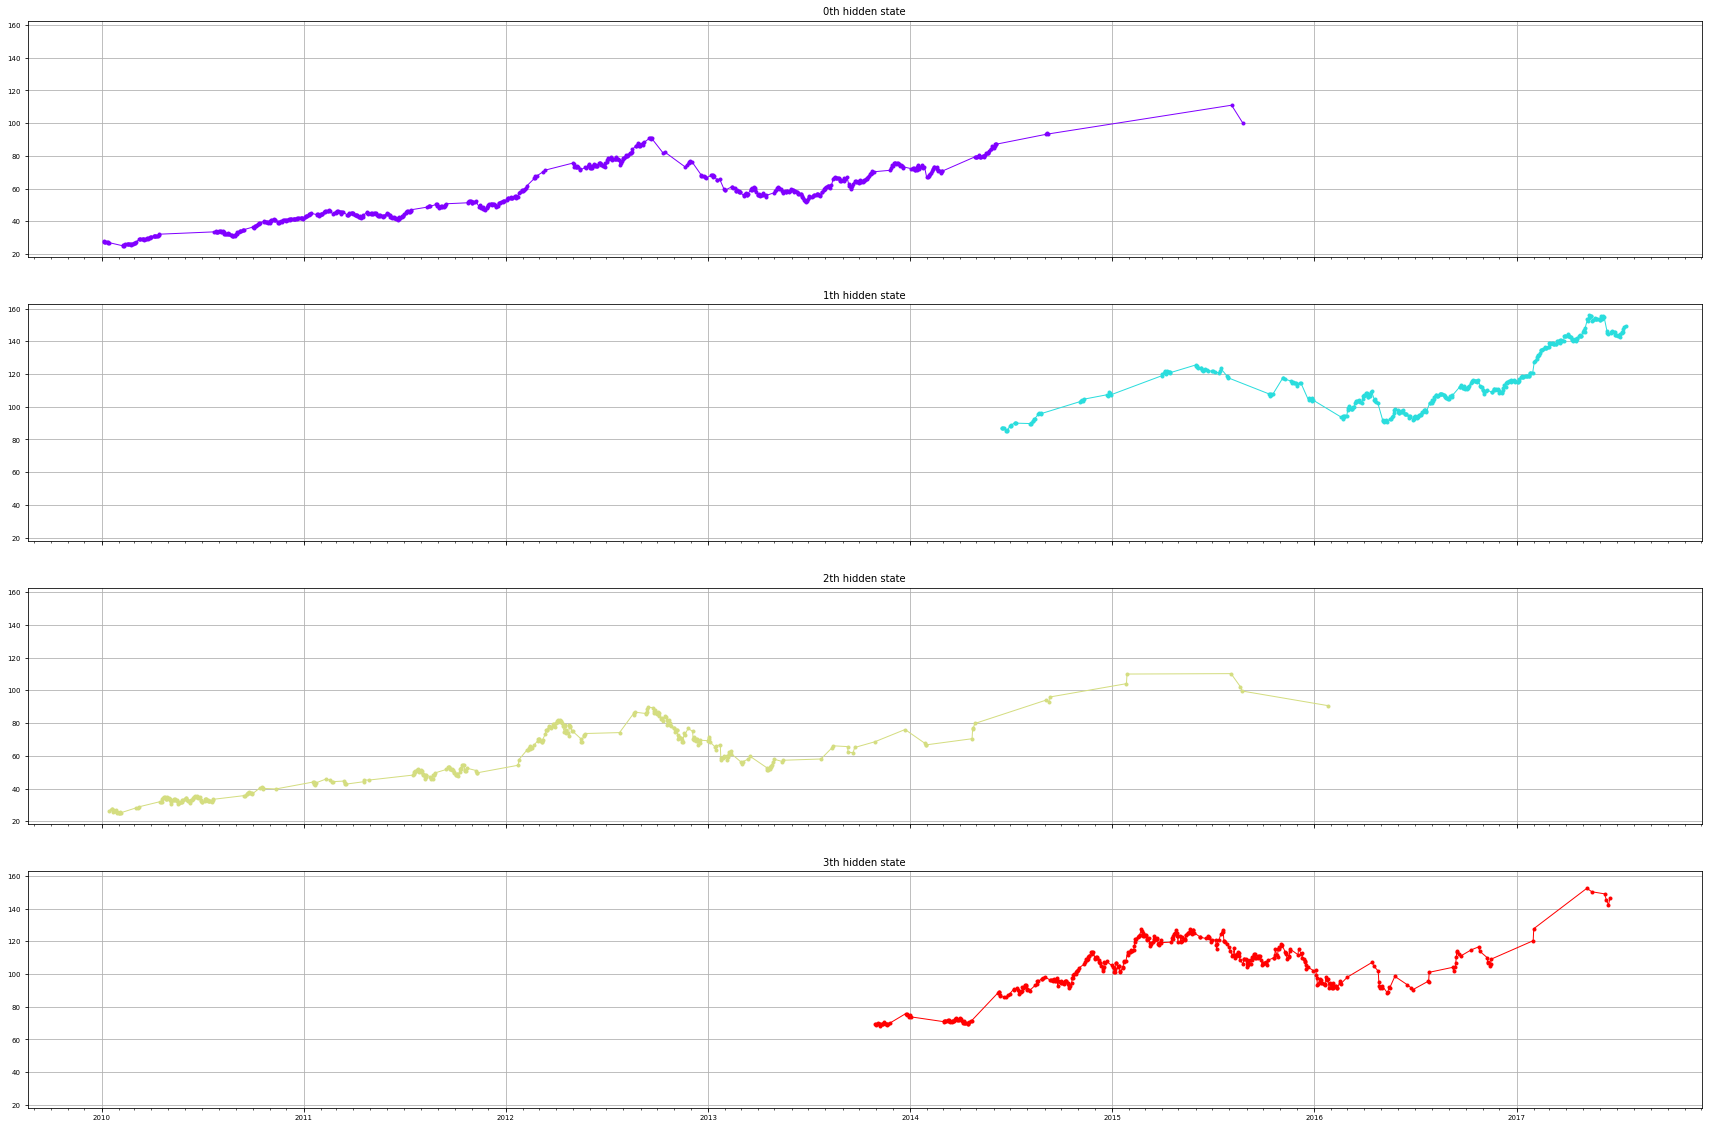

In [21]:
print("Transition matrix")
print(model.transmat_)
print()

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print()

#plt.figure(figsize=(30,15))
rcParams['figure.figsize'] = 30, 20

fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True)
colours = cm.rainbow(np.linspace(0, 1, model.n_components))
for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(dates[mask], close_v[mask], ".-", c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())

    ax.grid(True)

plt.show()